___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



4431872/4422102 [==============================] - 0s 0us/step


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

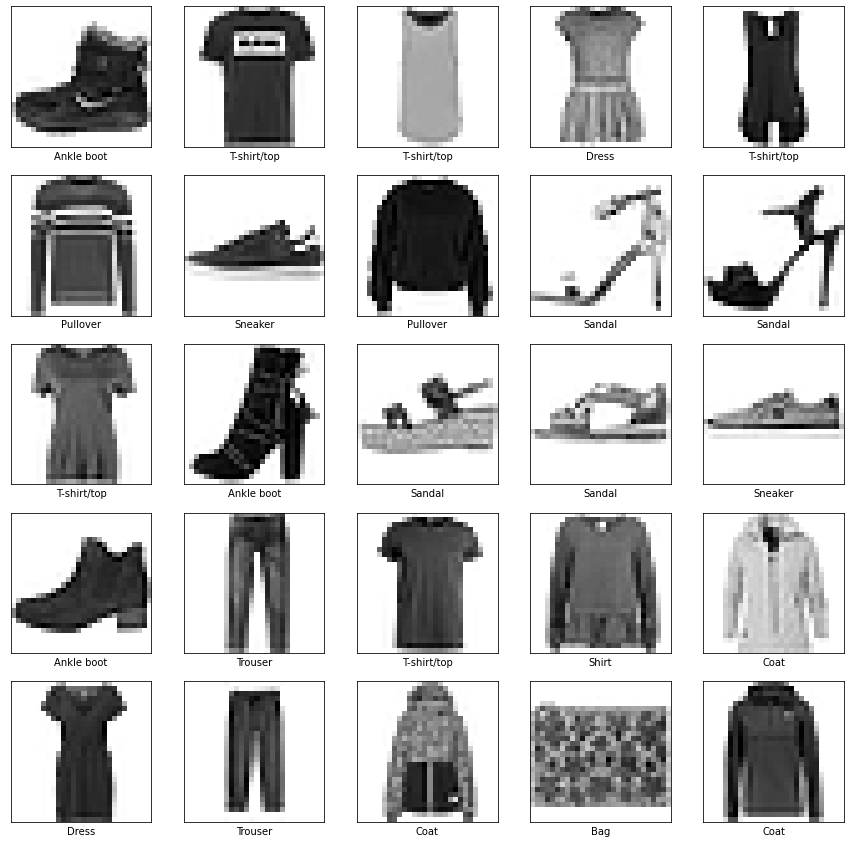

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train = y_train.reshape(-1, 1)
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [ ]:
ohe = OneHotEncoder(sparse=False)
y_train = ohe.fit_transform(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test = y_test.reshape(-1, 1)
y_test

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

In [ ]:
ohe = OneHotEncoder(sparse=False)
y_test = ohe.fit_transform(y_test)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test.shape

(10000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout

Let us separate 20% of the train set and use for validation purposes. The test set would be use for model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2018)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_initializer='he_normal', kernel_size=(3,3), input_shape=(28,28,1), activation='relu',padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
#model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 128)       

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode = "min", verbose = 1, patience = 25, restore_best_weights = True)
# we will use sligtly more lenient callbacks for early stopping
# making the default callbacks slighly more lenient
callbacks_list2 = [
    # reduce learning rate by a factor of 10 of val_loss 
    # does not reduce for 3 epochs
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=4,
        min_lr=0.000001
    ),
    # Early stop training if val_acc falls or stays flat for 7 epochs
    EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.0001,
        patience=7        
    ),
]

In [ ]:
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=50, 
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

Epoch 1/50
375/375 [==============================] - 3s 7ms/step - loss: 0.1350 - accuracy: 0.9500 - val_loss: 0.2554 - val_accuracy: 0.9137
Epoch 2/50
375/375 [==============================] - 2s 7ms/step - loss: 0.1187 - accuracy: 0.9560 - val_loss: 0.2585 - val_accuracy: 0.9178
Epoch 3/50
375/375 [==============================] - 2s 7ms/step - loss: 0.1034 - accuracy: 0.9617 - val_loss: 0.2624 - val_accuracy: 0.9207
Epoch 4/50
375/375 [==============================] - 2s 7ms/step - loss: 0.0891 - accuracy: 0.9664 - val_loss: 0.2679 - val_accuracy: 0.9222
Epoch 5/50
375/375 [==============================] - 2s 7ms/step - loss: 0.0790 - accuracy: 0.9707 - val_loss: 0.2812 - val_accuracy: 0.9197
Epoch 6/50
375/375 [==============================] - 2s 7ms/step - loss: 0.0682 - accuracy: 0.9754 - val_loss: 0.3012 - val_accuracy: 0.9176
Epoch 7/50
375/375 [==============================] - 2s 7ms/step - loss: 0.0596 - accuracy: 0.9776 - val_loss: 0.3186 - val_accuracy: 0.9227
Epoch 

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.135034,0.949979,0.255365,0.913667
1,0.118737,0.956042,0.258517,0.917750
2,0.103365,0.961729,0.262437,0.920667
3,0.089074,0.966396,0.267873,0.922250
4,0.079012,0.970667,0.281219,0.919750


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 128)       

**TASK 7: Plot values of metrics you used in your model.**

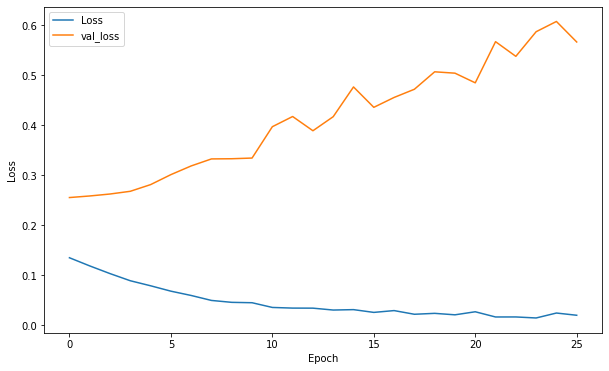

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "val_loss"], loc='best')

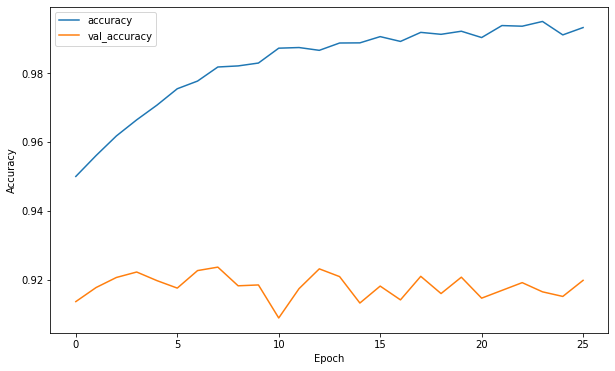

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["accuracy", "val_accuracy"], loc='best')

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
preds = model.predict(X_test)

In [ ]:
predictions= np.argmax(preds, axis=1)

In [ ]:
y_test_class= np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test_class, predictions, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.90      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.93      0.78      0.85      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.89      0.80      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.69      0.80      0.74      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
print(confusion_matrix(y_test_class, predictions))

[[895   0   7  14   2   0  79   0   3   0]
 [  5 978   0  15   0   0   1   0   1   0]
 [ 35   2 783   9  62   0 109   0   0   0]
 [ 19   1   3 942  11   0  24   0   0   0]
 [  4   1  18  41 802   0 134   0   0   0]
 [  0   0   0   0   0 984   0   9   0   7]
 [115   0  32  24  23   0 803   0   3   0]
 [  0   0   0   0   0  17   0 964   0  19]
 [ 13   0   0   5   2   4   6   2 968   0]
 [  1   0   0   0   0   6   0  31   0 962]]


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2732643187046051
Test accuracy: 0.9081000089645386


## New Model with Dropout: Overfitting

The validation accuracy does not improve after few epochs and the validation loss is increasing after few epochs. This confirms that the model is overfitted. To reduce overfitting problem, let us use dropout method and rerun the model.

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_initializer='he_normal', kernel_size=(3,3), input_shape=(28,28,1), activation='relu',padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten()) 
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 64)         

In [ ]:
model.fit(X_train, y_train, 
          batch_size=32, 
          epochs=100, 
          validation_data=(X_val, y_val),
          callbacks=callbacks_list2)

Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6327 - accuracy: 0.7646 - val_loss: 0.3896 - val_accuracy: 0.8597 - lr: 0.0010
Epoch 2/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4226 - accuracy: 0.8453 - val_loss: 0.3233 - val_accuracy: 0.8772 - lr: 0.0010
Epoch 3/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3838 - accuracy: 0.8601 - val_loss: 0.2792 - val_accuracy: 0.9002 - lr: 0.0010
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3526 - accuracy: 0.8717 - val_loss: 0.2802 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3388 - accuracy: 0.8745 - val_loss: 0.2654 - val_accuracy: 0.9045 - lr: 0.0010
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3322 - accuracy: 0.8784 - val_loss: 0.2540 - val_accuracy: 0.9089 - lr: 0.0010
Epoch 7/100
1500/1500 [=============================

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.632661,0.764646,0.389592,0.859750,0.001
1,0.422646,0.845250,0.323339,0.877167,0.001
2,0.383848,0.860125,0.279207,0.900167,0.001
3,0.352552,0.871750,0.280248,0.894750,0.001
4,0.338791,0.874479,0.265427,0.904500,0.001


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 64)         

**TASK 7: Plot values of metrics you used in your model.**

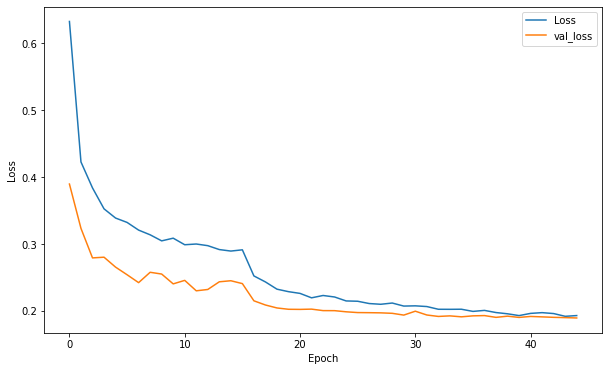

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "val_loss"], loc='best')

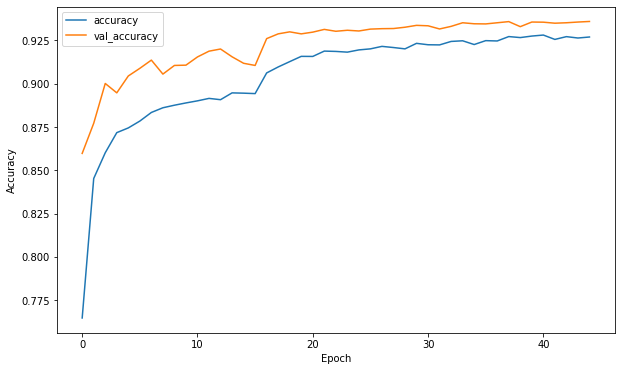

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["accuracy", "val_accuracy"], loc='best')

In [ ]:
preds = model.predict(X_test)

In [ ]:
predictions= np.argmax(preds, axis=1)

In [ ]:
y_test_class= np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test_class, predictions, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.88      0.88      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.89      0.88      0.89      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.86      0.89      0.88      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.78      0.76      0.77      1000
     Sneaker       0.94      0.99      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
print(confusion_matrix(y_test_class, predictions))

[[880   1  14  13   2   0  87   0   3   0]
 [  1 990   0   6   1   0   1   0   1   0]
 [ 13   1 882   9  47   0  47   0   1   0]
 [ 10   0   5 945  27   0  13   0   0   0]
 [  0   0  34  19 891   0  56   0   0   0]
 [  0   0   0   0   0 975   0  15   0  10]
 [ 93   0  51  27  66   0 758   0   5   0]
 [  0   0   0   0   0   6   0 988   0   6]
 [  1   0   0   5   2   1   4   1 986   0]
 [  0   0   0   0   0   4   1  43   0 952]]


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20739533007144928
Test accuracy: 0.9247000217437744


___Model Decision:___ With a complex sequential model with multiple convolution layers and 50 epochs with batch size of 128 for the training, we obtained an accuracy ~0.91 for test prediction. After investigating the validation accuracy and loss, we understood that the model is overfitting. 

We retrained the model with Dropout layers to the model to reduce overfitting.
We confirmed the model improvement and with the same number of epochs for the training we obtained with the new model an accuracy of ~0.925 for test prediction. Only few classes are not correctly classified all the time, especially Class 6 (Shirt) and Class 2 (Pullover). Another major change is related to callbacks. In the first model, we use early stopping. But, in the new model we introduce val_accuracy and val_loss with learning rate limits for stopping conditions

## Prediction

In [ ]:
model.save('CNN_ModelNew')

INFO:tensorflow:Assets written to: CNN_ModelNew/assets


In [ ]:
!pip install tensorflow

In [4]:
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
model = load_model('CNN_ModelNew.h5')

NameError: name 'CNN_ModelNew' is not defined

In [ ]:
my_sample = X_test[3]

In [ ]:
my_sample.shape

(28, 28, 1)

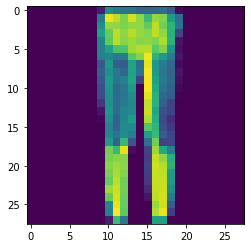

In [ ]:
plt.imshow(my_sample.reshape(28,28));

In [ ]:
pred_prob = model.predict(my_sample.reshape(1,28,28,1))
pred_prob

array([[9.0565193e-35, 1.0000000e+00, 6.6446570e-32, 2.0595697e-28,
        3.5943943e-33, 0.0000000e+00, 1.6163704e-29, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [ ]:
print(classes[np.argmax(y_test[3])])
print(classes[y_pred])

Trouser
Trouser


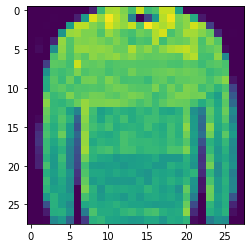

In [ ]:
my_sample = X_test[20]
plt.imshow(my_sample.reshape(28,28));


In [ ]:
pred_prob = model.predict(my_sample.reshape(1,28,28,1))
y_pred = np.argmax(pred_prob)
print(classes[np.argmax(y_test[20])])
print(classes[y_pred])


Pullover
Pullover


T-shirt/top
T-shirt/top


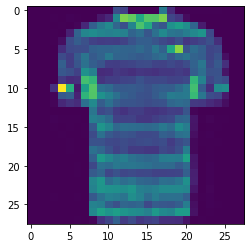

In [ ]:
my_sample = X_test[35]
plt.imshow(my_sample.reshape(28,28));
pred_prob = model.predict(my_sample.reshape(1,28,28,1))
y_pred = np.argmax(pred_prob)
print(classes[np.argmax(y_test[35])])
print(classes[y_pred])

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___